# Titanic Survivors Predictors
This notebook is a walkthrough of the attempts made to create accurate predictors for the titanic survivors dataset.  It contains analysis of the data, followed by creation of a baseline benchmark predictor.  This benchmark is then used to measure the relative success of later models.

## Import libraries, read in data, and inspect.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

print(titanic_train.head(5))
print(titanic_train.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

### Inspect the features

Intuitively, Pclass, Age, SibSp, and Fare seem likely to be the most useful numeric features in this data.  Sex seems like a useful non-numeric feature.  Embarked may also be useful, because it may have some indication of the social status of a passenger, although this information is probably already present through Pclass and fare.  Similarly, Cabin could be useful for the same purpose, as well as providing information about a passenger's proximity to life boats.  We will inspect these further by visualization.  

In order to make plotting the data easier, let's first do some quick fixup.

#### Fixing up the data:

First, set values for all missing age attributes<br>
Then, encode the gender values

In [129]:
titanic_train["Age"] = titanic_train["Age"].fillna(titanic_train["Age"].median())

#Set the "Sex" value to 0 for any entry that has "Sex" value of "male" and set the value to 1 for any entry that has
#"Sex" value of "female"
titanic_train.loc[titanic_train["Sex"] == "male", "Sex"] = 0
titanic_train.loc[titanic_train["Sex"] == "female", "Sex"] = 1

titanic_train["Name_Length"] = titanic_train["Name"].str.len()



titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

titanic_test["Name_Length"] = titanic_test["Name"].str.len()

<br>Now, Check the values of other non-numeric features; encode them accordingly.

['S' 'C' 'Q' nan]


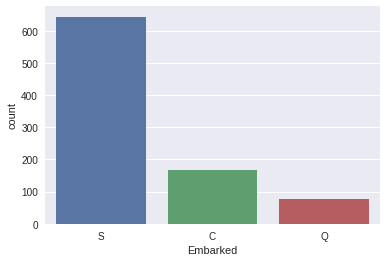

In [28]:
print(titanic_train["Embarked"].unique())
sns.countplot(titanic_train['Embarked'])

<br>Seeing that not all entries have values for "Embarked" and "S" is by far the most common value for this feature, we will set the missing values to "S".

In [52]:
titanic_train.loc[titanic_train["Embarked"] == "nan", "Embarked"] = "S"
titanic_train.loc[titanic_train["Embarked"] == "S", "Embarked"] = 0
titanic_train.loc[titanic_train["Embarked"] == "C", "Embarked"] = 1
titanic_train.loc[titanic_train["Embarked"] == "Q", "Embarked"] = 2

titanic_test.loc[titanic_test["Embarked"] == "nan", "Embarked"] = "S"
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

#### Visualizing the Data:

Now, lets get a better idea of the overall proportion of survivors, by plotting the number of the survived beside the number of the deceased.

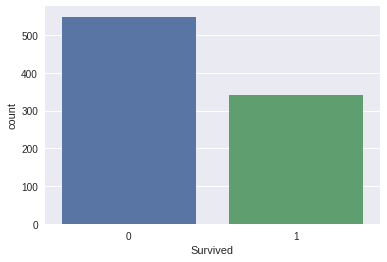

In [14]:
sns.countplot(titanic_train['Survived'])

Now, lets plot each of the selected features against the survived feature, to see if any values tend to have disproportionate survival ratios.
<br><br>


#### Pclass

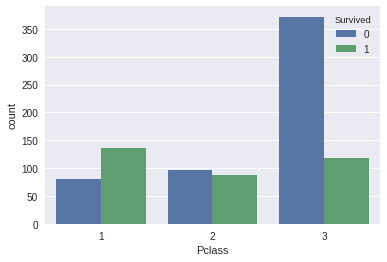

In [18]:
sns.countplot(titanic_train['Pclass'], hue=titanic_train['Survived'])

#### Age

Age
[0.42, 17]    0.539823
(17, 22]      0.313559
(22, 27]      0.405660
(27, 28]      0.292079
(28, 29]      0.363636
(29, 35]      0.451327
(35, 45]      0.394737
(45, 80]      0.368932
Name: Survived, dtype: float64

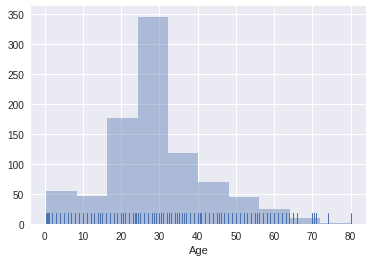

In [63]:
sns.distplot(titanic_train['Age'], bins=10, kde=False, rug=True)

titanic_train['Survived'].groupby(pd.qcut(titanic_train['Age'],8)).mean()

#### SibSp

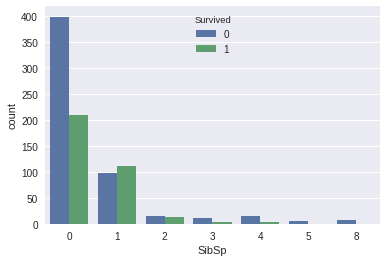

In [55]:
sns.countplot(titanic_train['SibSp'], hue=titanic_train['Survived'])

#### Fare

Fare
[0, 7.229]          0.142857
(7.229, 7.75]       0.271429
(7.75, 7.854]       0.256410
(7.854, 7.925]      0.209677
(7.925, 8.662]      0.134328
(8.662, 10.5]       0.272727
(10.5, 13]          0.461538
(13, 15.678]        0.297872
(15.678, 21.679]    0.483333
(21.679, 26]        0.459016
(26, 30]            0.475410
(30, 39.688]        0.396552
(39.688, 62.439]    0.543860
(62.439, 90]        0.629032
(90, 512.329]       0.754386
Name: Survived, dtype: float64

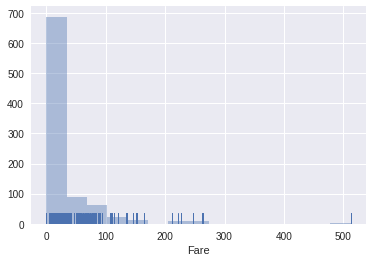

In [72]:
sns.distplot(titanic_train['Fare'], bins=15, kde=False, rug=True)

titanic_train['Survived'].groupby(pd.qcut(titanic_train['Fare'],15)).mean()

#### Sex

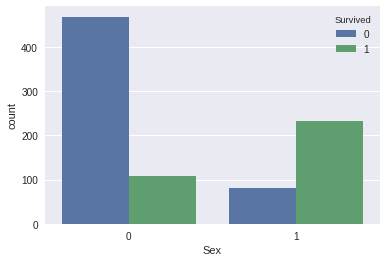

In [45]:
sns.countplot(titanic_train['Sex'], hue=titanic_train['Survived'])

#### Embarked

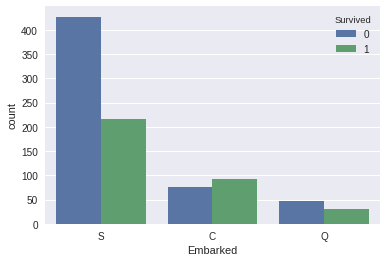

In [46]:
sns.countplot(titanic_train['Embarked'], hue=titanic_train['Survived'])

#### Cabin

By observing the first 5 elements of the datatable, we saw that 3 of those 5 had values of NaN for Cabin, so lets see how many total elements in the datatable have this value.  If the total is negligible, we can replace those values with something else and use the feature.

In [53]:
print (titanic_train.Cabin.isnull().sum())

687


As we can see, this is a very large portion of our training data, so this feature will be ignored.<br><br>

In [130]:
#Clean data by removing useless or irrelevant columns4
features = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Name_Length"]
titanic_train_features = titanic_train[features]
titanic_train_labels = titanic_train["Survived"]


### Now, create a baseline predictor.

Create a k folds cross validator, and begin training and testing a Decision Tree classifier, optimized using a hyperparameter grid search.  The optimized Decision Tree will be the baseline classifier.

In [131]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold, GridSearchCV

#The scorer and kfold objects will be reused in later classifiers
scorer = make_scorer(accuracy_score)
kfold = KFold(n_splits=3, random_state=1)

dt_parameters = {'min_samples_split':[2,6,7,8], 
                 'max_depth':[3,6,7,8], 
                 'min_samples_leaf':[1,2,3]}

dt_grid_obj = GridSearchCV(DecisionTreeClassifier(random_state=32), dt_parameters, scoring=scorer, cv=kfold)
grid_fit = grid_obj.fit(titanic_train_features, titanic_train_labels)
best_clf = grid_fit.best_estimator_
predictions = best_clf.predict(titanic_train_features)

score = accuracy_score(titanic_train["Survived"], predictions)
print ("Score:", score)



Score: 0.827160493827


<br><b>Output the predictions of the decision tree to a csv file.</b>

In [134]:
titanic_test_features = titanic_test[features]
test_pred = best_clf.predict(titanic_test_features)
d = {'PassengerId':titanic_test["PassengerId"] , 'Survived': test_pred}
df = pd.DataFrame(data=d)
df.to_csv("dt_predictions.csv")

### Now, a Random Forest Classifier

We will now create a random forest classifier, and find the best model using grid search and using the same hyperparameters from the decision tree.

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_parameters = {"min_samples_split":[2,6,7,8], 
                 "max_depth":[2,6,7], 
                 "min_samples_leaf":[1,2,3],
                 "n_estimators":[15,16]}

rf_grid_obj = GridSearchCV(RandomForestClassifier(random_state=21), 
                           rf_parameters, scoring=scorer, cv=kfold)
rf_grid_fit = rf_grid_obj.fit(titanic_train_features, titanic_train_labels)
best_rf_clf = rf_grid_fit.best_estimator_
rf_predictions = best_rf_clf.predict(titanic_train_features)

rf_score = accuracy_score(titanic_train["Survived"], rf_predictions)
print ("Random Forest Score: ", rf_score)

Random Forest Score:  0.885521885522


In [135]:
rf_test_pred = best_rf_clf.predict(titanic_test_features)
d = {'PassengerId':titanic_test["PassengerId"] , 'Survived': rf_test_pred}
df = pd.DataFrame(data=d)
df.to_csv("rf_predictions.csv")

This scored approximately the same as a single decision tree, but a little bit better.  Let's try a boosted alorithm, AdaBoost.

### AdaBoost Classifier

In [136]:
from sklearn.ensemble import AdaBoostClassifier

ab_parameters = {"base_estimator__min_samples_split":[2,6,7,8], 
                 "base_estimator__max_depth":[6,7], 
                 "base_estimator__min_samples_leaf":[1,2,3],
                 "n_estimators":[2,3,4,5,6]}

ab_grid_obj = GridSearchCV(AdaBoostClassifier(random_state=21, 
                                base_estimator=DecisionTreeClassifier(random_state=21)), 
                           ab_parameters, scoring=scorer, cv=kfold)
ab_grid_fit = ab_grid_obj.fit(titanic_train_features, titanic_train_labels)
best_ab_clf = ab_grid_fit.best_estimator_
ab_predictions = best_ab_clf.predict(titanic_train_features)

ab_score = accuracy_score(titanic_train["Survived"], ab_predictions)
print ("Random Forest Score: ", ab_score)

Random Forest Score:  0.8911335578


In [137]:
ab_test_pred = best_ab_clf.predict(titanic_test_features)
d = {'PassengerId':titanic_test["PassengerId"] , 'Survived': ab_test_pred}
df = pd.DataFrame(data=d)
df.to_csv("ab_predictions.csv")